In [7]:
import sqlite3
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [16]:

conn = sqlite3.connect('time_database') 
c = conn.cursor()

#c.execute('''
          CREATE TABLE IF NOT EXISTS time_record
          ([entry_id] INTEGER PRIMARY KEY, [emp_ssn] TEXT, [emp_first_name] TEXT,
          [emp_last_name] TEXT, [ref_clock] INTEGER, [clock_in] TEXT, [clock_out] TEXT, [total_hours] TEXT)
          ''')


In [152]:
conn = sqlite3.connect('time_database') 
c = conn.cursor()
c.execute('''
          SELECT * FROM time_record
          ''')

df = pd.DataFrame(c.fetchall(), columns=['entry_id', 'emp_ssn', 'emp_first_name', 'emp_last_name', 'ref_clock',
                        'clock_in', 'clock_out', 'total_hours'])
df.tail(10)

,entry_id,emp_ssn,emp_first_name,emp_last_name,ref_clock,clock_in,clock_out,total_hours
44,974645,9746,Ross,Richesin,202210211204044,2022-10-21 12:04:04.347119,2022-10-21 12:05:34.707513,0.0384
45,974646,9746,Ross,Richesin,202210211214154,2022-10-21 12:14:15.785931,2022-10-21 12:17:53.937523,0.0606
46,974647,9746,Ross,Richesin,202210211226144,2022-10-21 12:26:14.066401,2022-10-21 12:39:25.252326,0.2198
47,974648,9746,Ross,Richesin,202210211243294,2022-10-21 12:43:29.313029,2022-10-21 12:57:49.692083,0.239
48,974649,9746,Ross,Richesin,202210241252000,2022-10-24 12:52:00.455906,2022-10-24 13:22:38.724668,0.5106
49,974650,9746,Ross,Richesin,202210251559071,2022-10-25 15:59:07.528024,2022-10-25 18:36:28.965326,2.6226
50,974651,9746,Ross,Richesin,202210261310032,2022-10-26 13:10:03.917919,2022-10-26 13:11:02.185325,0.0162
51,974652,9746,Ross,Richesin,202211091003492,2022-11-09 10:03:49.733798,2022-11-09 10:04:11.111888,0.0059
52,974653,9746,Ross,Richesin,202211161312042,2022-11-16 13:12:04.254379,2022-11-16 13:12:23.603282,0.0054
53,974654,9746,Ross,Richesin,202211291315181,2022-11-29 13:15:18.691108,null,null


In [113]:
clockin = '2022-09-26T19:10:32.008285'
clockout = '2022-09-26T21:10:32.008285'
period = '2022-09-26T20:10:32.008285'

#clockin.strftime("%Y-%m-%d %X")

a = datetime.fromisoformat(clockin)
b = datetime.fromisoformat(clockout)
#total = str(b-a)
#ssn = '9746'
#print(total)

all_periods = [()]
if period >=clockin and period <=clockout:
    print('between')


#total = datetime.strptime(clockout,'%Y-%m-%dT%H:%M:%SZ') - datetime.strptime(clockin,'%Y-%m-%dT%H:%M:%SZ')


between


In [78]:
clockout = '2022-10-18 15:34:11.811883'
total = '1.0034'
ssn = '9746'

In [79]:
conn = sqlite3.connect('time_database') 
c = conn.cursor()
#c.execute(
#f'UPDATE time_record SET clock_out = "{clockout}", total_hours = "{total}" WHERE emp_ssn == "{ssn}" and clock_out == null')
#c.commit()
c.execute("UPDATE time_record SET clock_out=?, total_hours=? WHERE emp_ssn=? and clock_out='null'", (clockout, total, ssn))

#c.execute("UPDATE time_record SET clock_out='null' WHERE entry_id=97461")
conn.commit()

c.close()


In [1]:
conn = sqlite3.connect('time_database') 
c = conn.cursor()
c.execute('''
          SELECT * FROM time_record
          ''')

df = pd.DataFrame(c.fetchall(), columns=['entry_id', 'emp_ssn', 'emp_first_name', 'emp_last_name', 'ref_clock',
                        'clock_in', 'clock_out', 'total_hours'])
df

NameError: name 'sqlite3' is not defined

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   entry_id        2 non-null      int64 
 1   emp_ssn         2 non-null      object
 2   emp_first_name  2 non-null      object
 3   emp_last_name   2 non-null      object
 4   clock_in        2 non-null      object
 5   clock_out       2 non-null      object
 6   total_hours     2 non-null      object
dtypes: int64(1), object(6)
memory usage: 240.0+ bytes


In [42]:
ssn = '9746'
conn = sqlite3.connect('time_database') 
c = conn.cursor()
#c.execute("SELECT clock_in FROM time_record WHERE emp_ssn=? and clock_out='null' ",(ssn))
c.execute(f' SELECT clock_in FROM time_record WHERE emp_ssn = "{ssn}" and clock_out="null";')

clockin = c.fetchone()[0]
c.close()

In [5]:
from datetime import datetime, timedelta

def get_hours(ssn):
    cur_date = datetime.now()
    ref_date = cur_date - timedelta(days=7)
    int_ref_date = int(ref_date.strftime("%Y%m%d%H%M%S"))

    conn = sqlite3.connect('time_database') 
    c = conn.cursor()

    c.execute(f' SELECT total_hours, ref_clock FROM time_record WHERE emp_ssn = "{ssn}" and ref_clock > "{int_ref_date}" ')
     #stored as string - so add a new column to database that stores dates as ints 
     #(2022-09-28 becomes 20220928) and just index

    entries = c.fetchall()
    conn.commit()
    c.close()

    print('entries', entries)
    #need to make list with total hours for each day

    y_list =[0,0,0,0,0,0,0]
    print(type(entries[0][1]))
    for entry in entries:

        ref_string = str(entry[1])
        ref = ref_string[-1]
        total_hours = float(entry[0])
        total_hours = round(total_hours * 2.0) / 2.0
        y_list[int(ref)] += total_hours

    return y_list


y = get_hours('9746')
print(y)

entries [('0.0352', 202210051340402), ('0.0388', 202210051550432), ('0.9647', 202210051558382), ('1.4599', 202210051657192)]
<class 'int'>
[0, 0, 2.5, 0, 0, 0, 0]


In [11]:
def generate_figure(y_hours):
    #y_hours = list(map(lambda x: x.replace('null', 0), y_hours))

    fig, ax = plt.subplots(figsize=(150,30))
    size = 150
    font = {'size': size}
    plt.rc('font', **font)

    x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    top = ax.spines["top"]
    top.set_visible(False)
    left_side = ax.spines["left"]
    left_side.set_visible(False)
    plt.yticks([]) 
    chart = plt.bar(x,y_hours,color='#e0f1ff')
    #e0f1ff
    #f0f8ff
    for label in (ax.get_xticklabels()):
        label.set_fontsize(size)
    for i in range(len(y_hours)):
        if y_hours[i] != 0 and y_hours[i]:
            plt.text(i, y_hours[i] +.25, f'{y_hours[i]} hours', ha = 'center')
    
    '''
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)  # rewind to beginning of file
    figdata_png = base64.b64encode(figfile.getvalue())
    '''
    return chart

entries [('0.0352', 202210051340402), ('0.0388', 202210051550432), ('0.9647', 202210051558382), ('1.4599', 202210051657192)]
<class 'int'>


<BarContainer object of 7 artists>

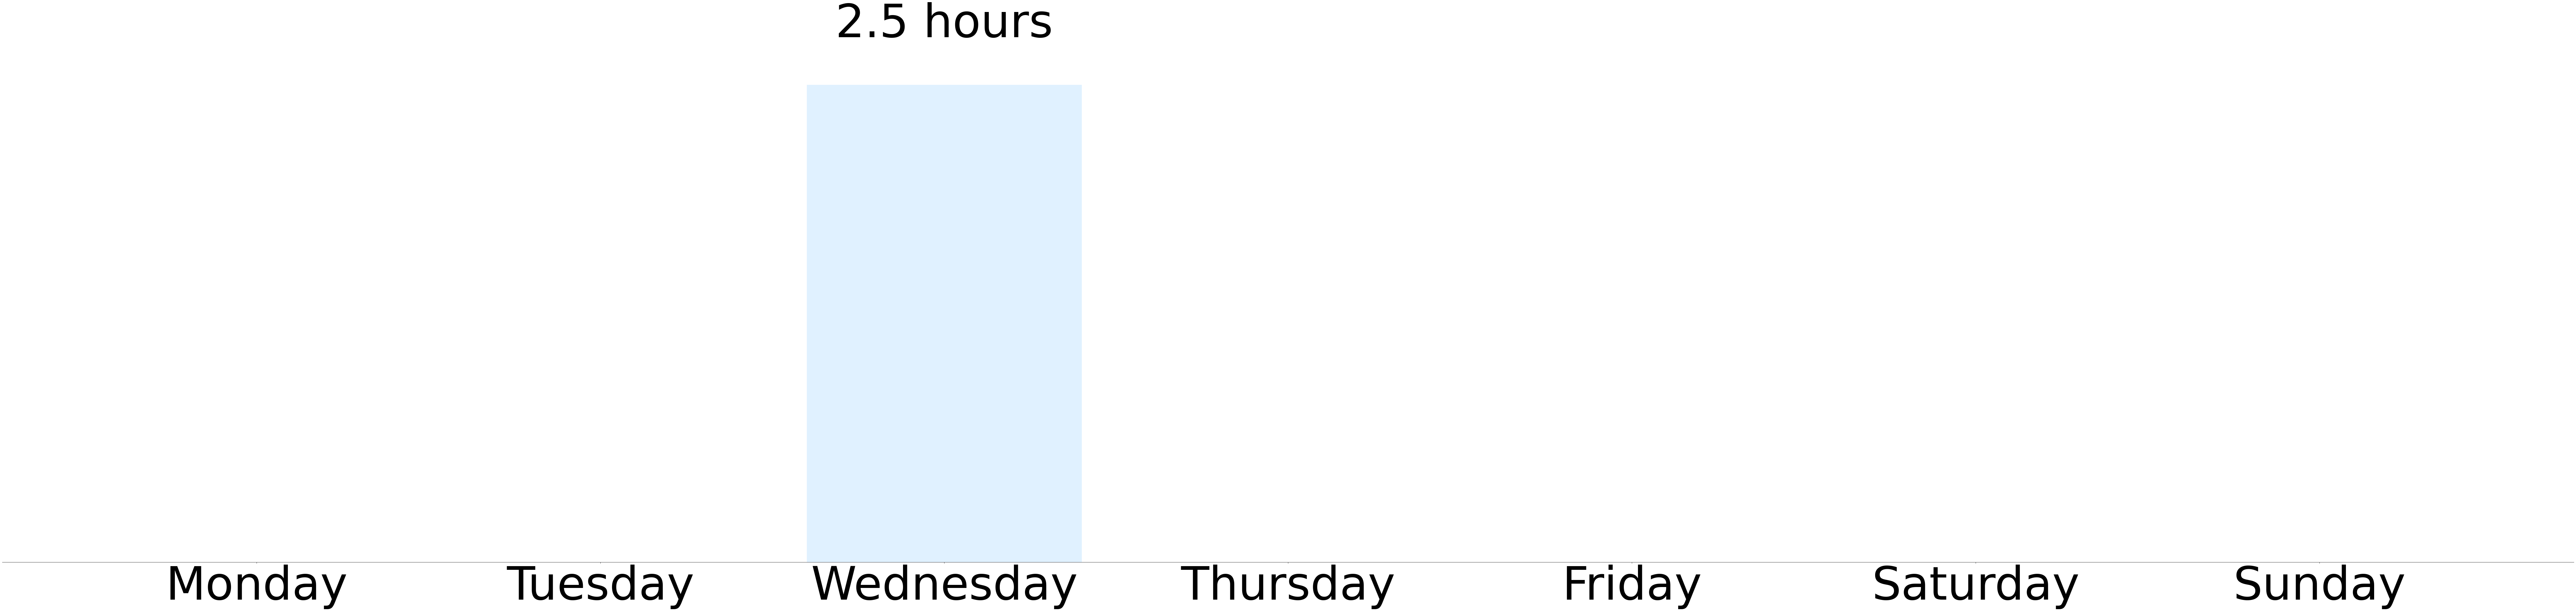

In [13]:
generate_figure(get_hours('9746'))

In [127]:
import matplotlib
matplotlib.use('Agg')
from flask import Flask, render_template, request, send_file
from flask_sqlalchemy import SQLAlchemy
import pandas as pd
import sqlite3
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from io import BytesIO
import base64
app = Flask(__name__)

# the name of the database; add path if necessary
db_name = 'time_database'

app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///' + db_name

app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = True

# this variable, db, used for all SQLAlchemy commands
db = SQLAlchemy(app)

class Time_record(db.Model):
    __tablename__ = 'time_record' 
    entry_id = db.Column(db.String, primary_key=True) #create entry id-in to pull when clocking out  9734in
    #active = db.Column(db.Integer) #1 for active (clocked in) 0 for not active (not clocked in)
    emp_ssn = db.Column(db.String) #last four ssn
    emp_first_name = db.Column(db.String)
    emp_last_name = db.Column(db.String)
    ref_clock = db.Column(db.Integer)
    clock_in = db.Column(db.String)
    clock_out = db.Column(db.String) #edit (update) table when emp clocks out
    total_hours = db.Column(db.Integer)


conn = sqlite3.connect('time_database') 
c = conn.cursor()

c.execute(f' SELECT entry_id, clock_in, clock_out, total_hours FROM time_record')
results = c.fetchall()
c.close()
#results = Time_record.query.filter().all()

days = {
    'monday': [], 
    'tuesday': [],
}

def split_days():
    

#print(results)
selected = []
start_period = datetime.fromisoformat('2022-10-24T00:00:00.000000')
end_period = datetime.fromisoformat('2022-10-30T23:59:59.999999')
for idx, item in enumerate(results):
    entry_id = item[0]
    clockin = datetime.fromisoformat(item[1])
    clockout = datetime.fromisoformat(item[2])
    total_hours = float(item[3])
    if start_period >=clockin and start_period <=clockout:
        new_total_hours = clockout - start_period
        selected.append((entry_id, start_period, clockout, new_total_hours))

    elif clockin <= end_period and clockout >= end_period:
        new_total_hours = end_period - clockin
        selected.append((entry_id, start_period, clockout, new_total_hours))

    elif clockout >= start_period:
        selected.append((entry_id, str(clockin), str(clockout), total_hours))






In [128]:
print(selected)

[(974649, '2022-10-24 12:52:00.455906', '2022-10-24 13:22:38.724668', 0.5106), (974650, '2022-10-25 15:59:07.528024', '2022-10-25 18:36:28.965326', 2.6226)]


In [140]:
employees = {
    '9746': 
        {'password': 'password',
        'first_name': 'Ross',
        'last_name': 'Richesin',
        'role': 'Emp'},
    '0000': 
        {'password': 'Apassword',
        'first_name': 'Renee',
        'last_name': 'Richesin',
        'role': 'Admin'}
}

In [147]:
ssn = [i for i in employees.keys() if employees[i]['first_name'] == 'Renee'][0]
print(ssn)

0000


In [150]:
x = 'ross'
print(x.title())

Ross
